In [94]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('C:/Users/HP/Py Code/ML/Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
df= df[['Age', 'Fare','Survived']]
df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [98]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [99]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df

,Age,Fare,Survived
0,22.000000,7.2500,0
1,38.000000,71.2833,1
2,26.000000,7.9250,1
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,1
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [100]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# PDF and QQ plot

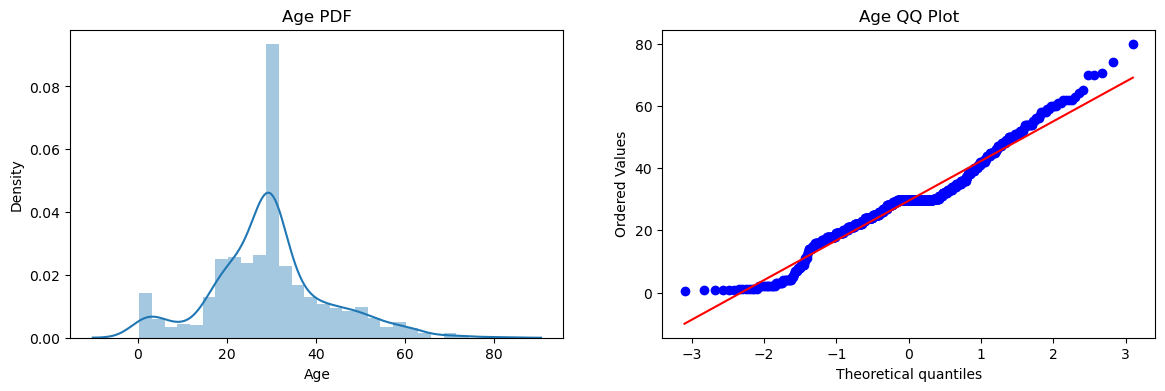

In [102]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

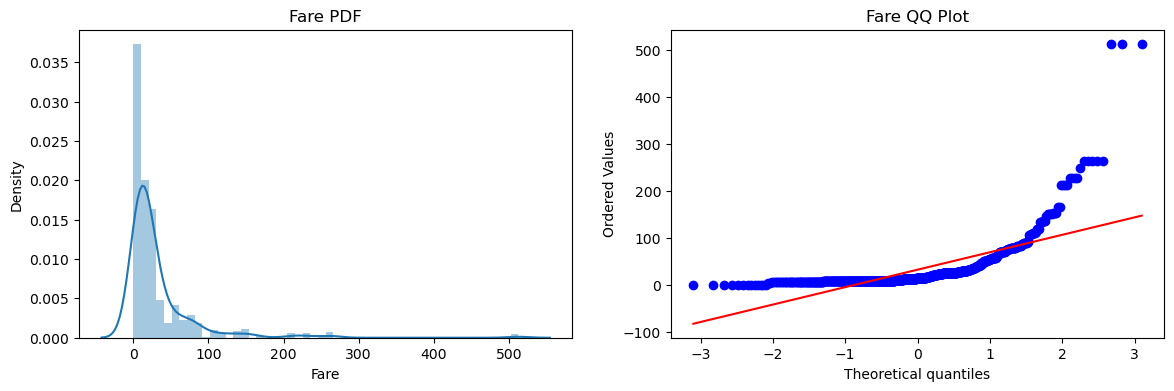

In [103]:
#Fare is not normal distributed
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# Model without log transformation

In [104]:
#without log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.6480446927374302


In [105]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


# log transformation

In [106]:
#Function transformation (Log Transform)
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

# Model with log transformation

In [107]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.6815642458100558


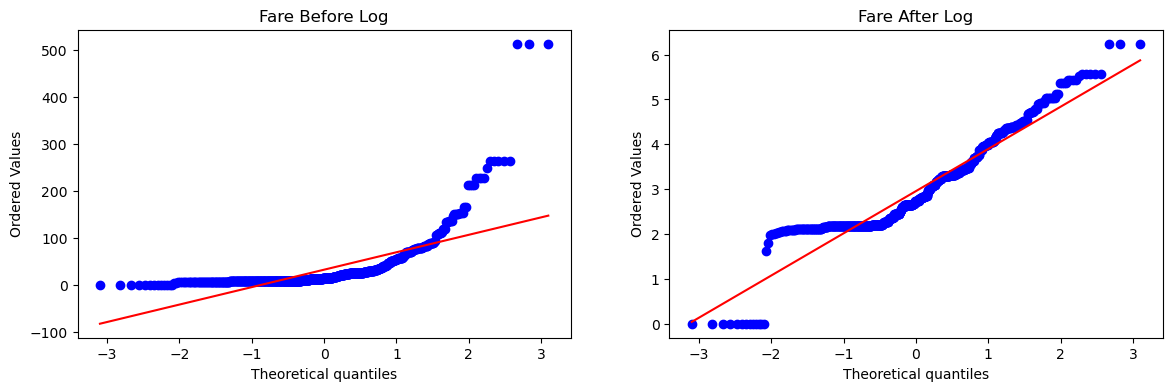

In [108]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()


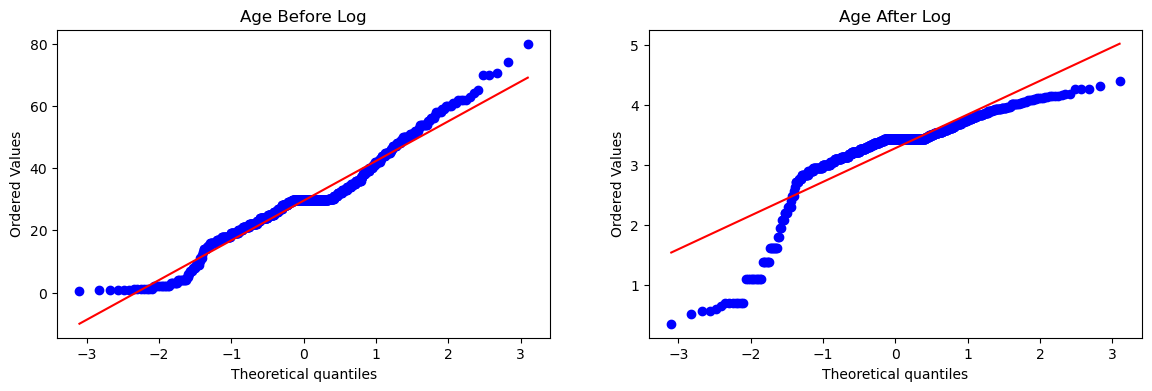

In [109]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()



# Column Transformer

In [110]:
tf = ColumnTransformer([('tf1',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed1 = tf.fit_transform(X_train)
X_test_transformed1 = tf.transform(X_test)

In [111]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed1,y_train)
y_pred1= clf.predict(X_test_transformed1)

print("accuracy : ", accuracy_score(y_test, y_pred1))

X_train['Fare']
X_train_transformed1=pd.DataFrame(X_train_transformed1)

accuracy :  0.6703910614525139


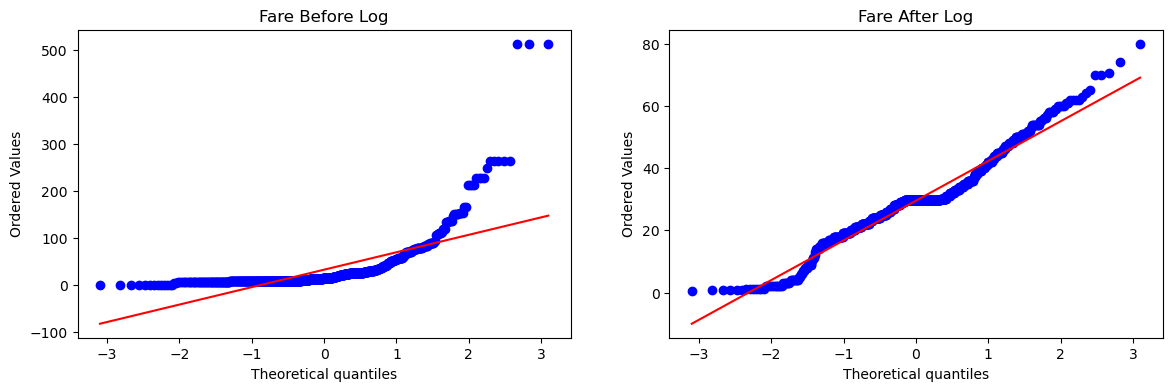

In [112]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed1[1], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()


In [115]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train )

X_train_transformed = pt.fit_transform(X_train+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

AttributeError: module 'numpy' has no attribute 'warnings'